## imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf

## Carregando os dados

Para os fins a que se destina estre trabalho, iremos utilizar duas bases de dados contendo diversas notícias brasileiras reais e fakes, igualmente distribuidas.



0 - REAL

1 - FAKE

#### Fake.br

Link do projeto: https://github.com/roneysco/Fake.br-Corpus

In [5]:
# tranformar os textos brutos do fakebr para um dataset
# import os

# fakebr_news = pd.DataFrame(columns=['text'])

# texts_path = [
#     (0, '/content/drive/MyDrive/Mentorama/projeto_final/datasets/fake.br/real/'),
#     (1, '/content/drive/MyDrive/Mentorama/projeto_final/datasets/fake.br/fake/')
# ]

# for label, path in texts_path:
#   for filename in os.listdir(path):
#       with open(os.path.join(path, filename)) as f:
#           observation = f.read()
#           current_df = pd.DataFrame({'text': [observation], 'label': [int(label)]})
#           fakebr_news = fakebr_news.append(current_df, ignore_index=True)

# fakebr_news.to_csv('/content/drive/MyDrive/Mentorama/projeto_final/datasets/fakebr.csv')

In [6]:
fakebr_news = pd.read_csv('/content/drive/MyDrive/Mentorama/projeto_final/datasets/fakebr.csv', index_col=[0])
fakebr_news

,text,label
0,Julgamento da chapa Dilma-Temer pode resultar ...,0.0
1,Os detetives voluntários que procuram aviões q...,0.0
2,A Polícia Federal atribui crime de corrupção ...,0.0
3,Entender objetivos dos EUA e pressionar Putin:...,0.0
4,Quem é o capitão que liderou rebelião contra o...,0.0
...,...,...
7195,Coreia do Norte ameaça explodir Nova York após...,1.0
7196,Teoria afirma que escolta de Obama era formada...,1.0
7197,Tognolli: Odebrecht vai dar tiro pra todo lado...,1.0
7198,União gastou quase R$ 1 bilhão com diárias par...,1.0


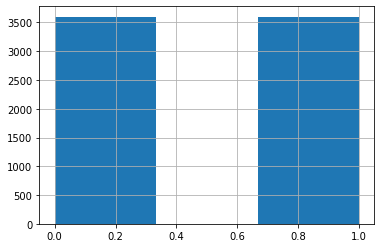

In [7]:
# verificando a distribuição da variável target
fakebr_news.label.hist(bins=3)

In [8]:
# categorizando a nosso target
fakebr_news['label'] = pd.Categorical(fakebr_news['label'])
fakebr_news['label'] = fakebr_news.label.cat.codes

In [9]:
fakebr_news.dtypes

text     object
label      int8
dtype: object

#### FakeRecogna

FakeRecogna é um conjunto de dados composto por notícias reais e falsas. A notícia real não está diretamente ligada às notícias falsas e vice-versa, o que pode levar a uma classificação tendenciosa. A coleta de notícias foi realizada por crawlers desenvolvidos para mineração de páginas de notícias de agências conhecidas e de grande relevância nacional. Os web crawlers foram desenvolvidos com base em cada página analisada, onde as informações extraídas são primeiramente separadas em categorias e depois agrupadas por datas. A pluralidade de notícias em várias páginas e os diferentes estilos de escrita proporcionam ao conjunto de dados uma grande diversidade para análise de processamento de linguagem natural e algoritmos de aprendizado de máquina.

Link do projeto: https://github.com/Gabriel-Lino-Garcia/FakeRecogna

In [10]:
recogna_news = pd.read_csv('/content/drive/MyDrive/Mentorama/projeto_final/datasets/FakeRecogna_no_removal_words_1_.csv', index_col=[0])

recogna_news['label'] = recogna_news['Classe'].apply(lambda x: 1 if x == 0 else 0)
recogna_news['text'] = recogna_news['Noticia'].apply(lambda x: str(x))

recogna_news = recogna_news.drop(['Subtitulo', 'Noticia', 'Categoria', 'Data', 'Autor', 'URL', 'Classe'], axis=1)
recogna_news = recogna_news.reset_index(drop=True)
recogna_news.head(1)

,label,text
0,1,bomba lira fraudar o votação brasília explodir...


In [11]:
recogna_news.dtypes

label     int64
text     object
dtype: object

In [12]:
# categorize labels
recogna_news['label'] = pd.Categorical(recogna_news['label'])
recogna_news['label'] = recogna_news.label.cat.codes

recogna_news.head(10)

,label,text
0,1,bomba lira fraudar o votação brasília explodir...
1,0,o whatsapp liberar quinta-feira atualização ap...
2,0,debater propor o cidade o campanha prefeitura ...
3,0,o alesp assembleia legislativo paulo aprovar h...
4,1,“ fauci aprovar o hidroxicloroquina haver ano ...
5,0,dia noite acessório passar o código vestimenta...
6,1,“ pra variar o esquerdo mentir foto e vídeo an...
7,0,o provável origem coronavírus mercar comercial...
8,0,o agência nacional vigilância sanitário anvisa...
9,1,sucessivo falhar umar d atribuir diretamente o...


In [13]:
recogna_news.shape


(11902, 2)

In [14]:
recogna_news.dtypes


label      int8
text     object
dtype: object

#### Juntando os dois datasets

In [15]:
final_data = pd.concat([recogna_news, fakebr_news], ignore_index=True)
final_data

,label,text
0,1,bomba lira fraudar o votação brasília explodir...
1,0,o whatsapp liberar quinta-feira atualização ap...
2,0,debater propor o cidade o campanha prefeitura ...
3,0,o alesp assembleia legislativo paulo aprovar h...
4,1,“ fauci aprovar o hidroxicloroquina haver ano ...
...,...,...
19097,1,Coreia do Norte ameaça explodir Nova York após...
19098,1,Teoria afirma que escolta de Obama era formada...
19099,1,Tognolli: Odebrecht vai dar tiro pra todo lado...
19100,1,União gastou quase R$ 1 bilhão com diárias par...


0

## Explorando os dados

## Modelando os dados

In [16]:
from sklearn.model_selection import train_test_split

#split train test val
ds_train, ds_test = train_test_split(final_data)

# split validation set
ds_test, ds_val = train_test_split(ds_test)

print(ds_train.shape, ds_test.shape, ds_val.shape)

(14326, 2) (3582, 2) (1194, 2)


In [17]:
ds_train

,label,text
14052,0,Por que economista do MIT diz que os EUA estão...
13706,0,Assolados por uma grave crise de legitimidade...
16613,1,Marca de sabão em pó faz publicidade de gênero...
10152,0,o juiz varar interessar difuso e coletivos com...
15897,1,CUIDADO! PL 280 (proposto por senador citado n...
...,...,...
17825,1,Cliente pede frango e leva rato frito em rede ...
14226,0,Temer diz que segue na Presidência e pede susp...
10729,0,anteontem o cidadão itabuna o km salvador o su...
9528,0,o deputar federal e presidente trabalhador pt ...


In [18]:
ds_train.dtypes


label      int8
text     object
dtype: object

In [19]:
# make a tensor dataset and split into batches

batch_size = 32

raw_train_ds = tf.data.Dataset.from_tensor_slices((ds_train.text.values, ds_train.label.values))
raw_test_ds = tf.data.Dataset.from_tensor_slices((ds_test.text.values, ds_test.label.values))
raw_val_ds = tf.data.Dataset.from_tensor_slices((ds_val.text.values, ds_val.label.values))

raw_train_ds = raw_train_ds.batch(batch_size)
raw_test_ds = raw_test_ds.batch(batch_size)
raw_val_ds = raw_val_ds.batch(batch_size)

In [20]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(10):
    print("Notícia: ", text_batch.numpy()[i])
    print("Label:", label_batch.numpy()[i])


Notícia:  b'Por que economista do MIT diz que os EUA est\xc3\xa3o cada vez mais parecidos com a Argentina. Autor de um livro sobre o desaparecimento da classe m\xc3\xa9dia nos Estados Unidos, Peter Temin explica as semelhan\xc3\xa7as que v\xc3\xaa entre a maior economia do mundo e pa\xc3\xadses emergentes..  A Am\xc3\xa9rica Latina conhece bem sociedades em que h\xc3\xa1 um enorme abismo entre ricos e pobres, mas o economista Peter Temin acredita que esse fen\xc3\xb4meno alcan\xc3\xa7a cada vez mais a maior economia do mundo: os Estados Unidos. Professor de Economia do prestigiado Instituto de Tecnologia de Massachusetts (MIT, na sigla em ingl\xc3\xaas), ele faz uma compara\xc3\xa7\xc3\xa3o com um pa\xc3\xads latinoamericano em particular. "Minha sensa\xc3\xa7\xc3\xa3o \xc3\xa9 que estamos ficando mais parecidos com a Argentina", diz ele. Seu paralelo vai al\xc3\xa9m do potencial econ\xc3\xb4mico de duas grandes na\xc3\xa7\xc3\xb5es com recursos naturais, que conseguiram desenvolver su

## Pre Processamento dos dados

In [21]:
from tensorflow import keras
from keras.layers import TextVectorization

VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 100

binary_vectorize_layer = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='binary')

int_vectorize_layer = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=MAX_SEQUENCE_LENGTH)


In [22]:
# Make a text-only dataset (without labels), then call `TextVectorization.adapt`.
train_text = raw_train_ds.map(lambda text, labels: text)
binary_vectorize_layer.adapt(train_text)
int_vectorize_layer.adapt(train_text)


In [23]:
# function to print result
def binary_vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return binary_vectorize_layer(text), label

def int_vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return int_vectorize_layer(text), label


In [24]:
# Retrieve a batch (of 32 reviews and labels) from the dataset.
text_batch, label_batch = next(iter(raw_train_ds))
first_question, first_label = text_batch[0], label_batch[0]
print("Question", first_question)
print("Label", first_label)


Question tf.Tensor(b'Por que economista do MIT diz que os EUA est\xc3\xa3o cada vez mais parecidos com a Argentina. Autor de um livro sobre o desaparecimento da classe m\xc3\xa9dia nos Estados Unidos, Peter Temin explica as semelhan\xc3\xa7as que v\xc3\xaa entre a maior economia do mundo e pa\xc3\xadses emergentes..  A Am\xc3\xa9rica Latina conhece bem sociedades em que h\xc3\xa1 um enorme abismo entre ricos e pobres, mas o economista Peter Temin acredita que esse fen\xc3\xb4meno alcan\xc3\xa7a cada vez mais a maior economia do mundo: os Estados Unidos. Professor de Economia do prestigiado Instituto de Tecnologia de Massachusetts (MIT, na sigla em ingl\xc3\xaas), ele faz uma compara\xc3\xa7\xc3\xa3o com um pa\xc3\xads latinoamericano em particular. "Minha sensa\xc3\xa7\xc3\xa3o \xc3\xa9 que estamos ficando mais parecidos com a Argentina", diz ele. Seu paralelo vai al\xc3\xa9m do potencial econ\xc3\xb4mico de duas grandes na\xc3\xa7\xc3\xb5es com recursos naturais, que conseguiram desen

In [25]:
print("'binary' vectorized question:",
      binary_vectorize_text(first_question, first_label)[0])
print()
print("'int' vectorized question:",
      int_vectorize_text(first_question, first_label)[0])


'binary' vectorized question: tf.Tensor([[1. 1. 1. ... 0. 0. 0.]], shape=(1, 10000), dtype=float32)

'int' vectorized question: tf.Tensor(
[[  19    6 3438    7    1   71    6   17  197  120  289  185   26    1
    13    4 3612 1150    3   12 1068   45    2 5926    8 1749 1507   62
   259  403 8633    1 1037   22    1    6 1545   60    4  193  394    7
   115    5  426    1    4 1148 2688 3136  236 7399    9    6   69   12
  1961    1   60 4687    5 2774   30    2 3438 8633    1 1611    6  124
  2843    1  289  185   26    4  193  394    7  115   17  259  403  857
     3  394    7    1  238    3  981    3    1    1   15 2017    9 1421
    27  296]], shape=(1, 100), dtype=int64)


In [26]:
print("1289 ---> ", int_vectorize_layer.get_vocabulary()[1289])
print("313 ---> ", int_vectorize_layer.get_vocabulary()[313])
print("Vocabulary size: {}".format(len(int_vectorize_layer.get_vocabulary())))


1289 --->  chino
313 --->  base
Vocabulary size: 10000


In [27]:
# encoding all datasets

binary_train_ds = raw_train_ds.map(binary_vectorize_text)
binary_val_ds = raw_val_ds.map(binary_vectorize_text)
binary_test_ds = raw_test_ds.map(binary_vectorize_text)

int_train_ds = raw_train_ds.map(int_vectorize_text)
int_val_ds = raw_val_ds.map(int_vectorize_text)
int_test_ds = raw_test_ds.map(int_vectorize_text)


In [28]:
AUTOTUNE = tf.data.AUTOTUNE

def configure_dataset(dataset):
  return dataset.cache().prefetch(buffer_size=AUTOTUNE)

binary_train_ds = configure_dataset(binary_train_ds)
binary_val_ds = configure_dataset(binary_val_ds)
binary_test_ds = configure_dataset(binary_test_ds)

int_train_ds = configure_dataset(int_train_ds)
int_val_ds = configure_dataset(int_val_ds)
int_test_ds = configure_dataset(int_test_ds)


## Modelagem

#### helpers

In [29]:
import keras
from matplotlib import pyplot as plt

def plot_accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

#### Binary Model

Epoch 1/10
448/448 [==============================] - 3s 6ms/step - loss: 0.2748 - accuracy: 0.9296 - val_loss: 0.1707 - val_accuracy: 0.9539
Epoch 2/10
448/448 [==============================] - 1s 3ms/step - loss: 0.1250 - accuracy: 0.9698 - val_loss: 0.1321 - val_accuracy: 0.9564
Epoch 3/10
448/448 [==============================] - 1s 3ms/step - loss: 0.0876 - accuracy: 0.9810 - val_loss: 0.1183 - val_accuracy: 0.9598
Epoch 4/10
448/448 [==============================] - 1s 3ms/step - loss: 0.0676 - accuracy: 0.9856 - val_loss: 0.1124 - val_accuracy: 0.9590
Epoch 5/10
448/448 [==============================] - 1s 3ms/step - loss: 0.0546 - accuracy: 0.9883 - val_loss: 0.1099 - val_accuracy: 0.9573
Epoch 6/10
448/448 [==============================] - 1s 3ms/step - loss: 0.0454 - accuracy: 0.9917 - val_loss: 0.1095 - val_accuracy: 0.9556
Epoch 7/10
448/448 [==============================] - 1s 3ms/step - loss: 0.0384 - accuracy: 0.9942 - val_loss: 0.1102 - val_accuracy: 0.9581
Epoch 

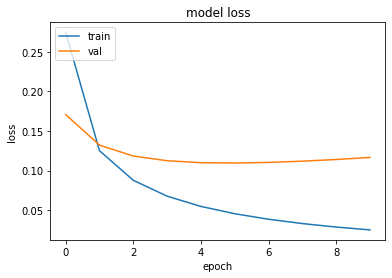

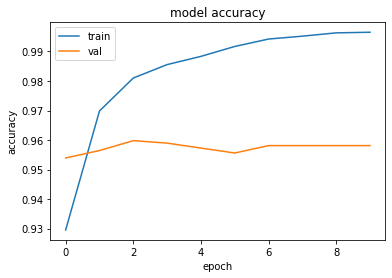

In [30]:
from tensorflow.keras import layers
from tensorflow.keras import losses

binary_model = tf.keras.Sequential([layers.Dense(2)])

binary_model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy'])

history = binary_model.fit(
    binary_train_ds, validation_data=binary_val_ds, epochs=10)
plot_loss(history)
plot_accuracy(history)

In [31]:
print("Linear model on binary vectorized data:")
print(binary_model.summary())


Linear model on binary vectorized data:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 20002     
                                                                 
Total params: 20,002
Trainable params: 20,002
Non-trainable params: 0
_________________________________________________________________
None


#### Int Model

Epoch 1/5
448/448 [==============================] - 9s 20ms/step - loss: 0.3551 - accuracy: 0.8293 - val_loss: 0.2136 - val_accuracy: 0.9154
Epoch 2/5
448/448 [==============================] - 7s 16ms/step - loss: 0.1282 - accuracy: 0.9538 - val_loss: 0.2059 - val_accuracy: 0.9255
Epoch 3/5
448/448 [==============================] - 7s 16ms/step - loss: 0.0433 - accuracy: 0.9881 - val_loss: 0.2252 - val_accuracy: 0.9246
Epoch 4/5
448/448 [==============================] - 7s 16ms/step - loss: 0.0105 - accuracy: 0.9983 - val_loss: 0.2680 - val_accuracy: 0.9179
Epoch 5/5
448/448 [==============================] - 7s 16ms/step - loss: 0.0036 - accuracy: 0.9996 - val_loss: 0.2900 - val_accuracy: 0.9188


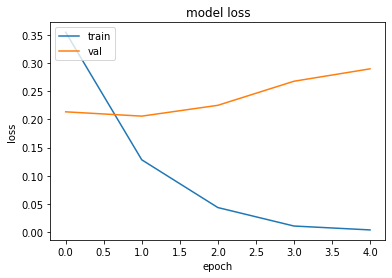

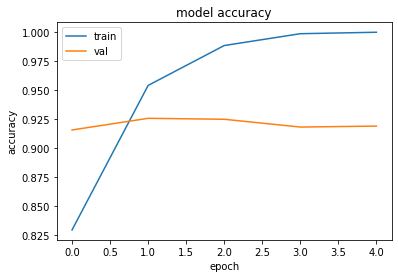

In [32]:
def create_model(vocab_size, num_labels):
  model = tf.keras.Sequential([
      layers.Embedding(vocab_size, 64, mask_zero=True),
      layers.Conv1D(64, 5, padding="valid", activation="relu", strides=2),
      layers.GlobalMaxPooling1D(),
      layers.Dense(num_labels)
  ])
  return model

# `vocab_size` is `VOCAB_SIZE + 1` since `0` is used additionally for padding.
int_model = create_model(vocab_size=VOCAB_SIZE + 1, num_labels=2)
int_model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy'])
history = int_model.fit(int_train_ds, validation_data=int_val_ds, epochs=5)
plot_loss(history)
plot_accuracy(history)

In [33]:
print("ConvNet model on int vectorized data:")
print(int_model.summary())


ConvNet model on int vectorized data:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640064    
                                                                 
 conv1d (Conv1D)             (None, None, 64)          20544     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 660,738
Trainable params: 660,738
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
binary_loss, binary_accuracy = binary_model.evaluate(binary_test_ds)
int_loss, int_accuracy = int_model.evaluate(int_test_ds)

print("Binary model accuracy: {:2.2%}".format(binary_accuracy))
print("Int model accuracy: {:2.2%}".format(int_accuracy))


112/112 [==============================] - 1s 5ms/step - loss: 0.3018 - accuracy: 0.9123
Binary model accuracy: 96.57%
Int model accuracy: 91.23%


#### Validando o modelo final no dataset de teste puro

In [35]:
export_model = tf.keras.Sequential(
    [binary_vectorize_layer, binary_model,
     layers.Activation('softmax')])

export_model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer='adam',
    metrics=['accuracy'])

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print("Accuracy: {:2.2%}".format(binary_accuracy))


112/112 [==============================] - 1s 4ms/step - loss: 0.1012 - accuracy: 0.9657
Accuracy: 96.57%


In [42]:
random = np.random.randint(0, final_data.shape[0])
inputs = [
    final_data.text[random]
]

predicted_scores = export_model.predict(inputs)
predicted_labels = tf.argmax(predicted_scores, axis=1)

print(predicted_labels[0])
print([i.round(2) for i in predicted_scores[0]])
print(final_data.label[random])


tf.Tensor(1, shape=(), dtype=int64)
[0.01, 0.99]
1


In [37]:
# salvando modelo
export_model.save('/content/drive/MyDrive/Mentorama/projeto_final/modelo_final_0')

#### Save to production

In [38]:
from joblib import dump, load

In [39]:
dump(export_model, '/content/drive/MyDrive/Mentorama/projeto_final/fake-detector_v0.joblib')

['/content/drive/MyDrive/Mentorama/projeto_final/fake-detector_v0.joblib']